In [2]:
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] =(15.0, 7.0)

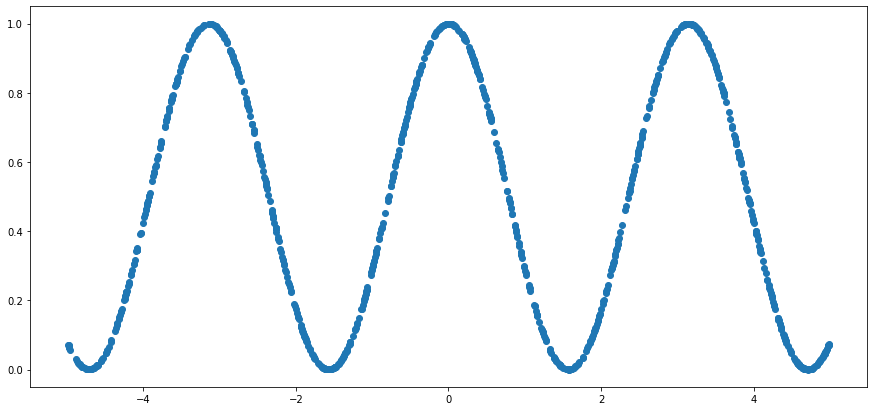

In [112]:
x_train = torch.rand(1000)
x_train = x_train*10.0 -5.0

y = torch.cos(x_train)**2

plt.plot(x_train, y, 'o')

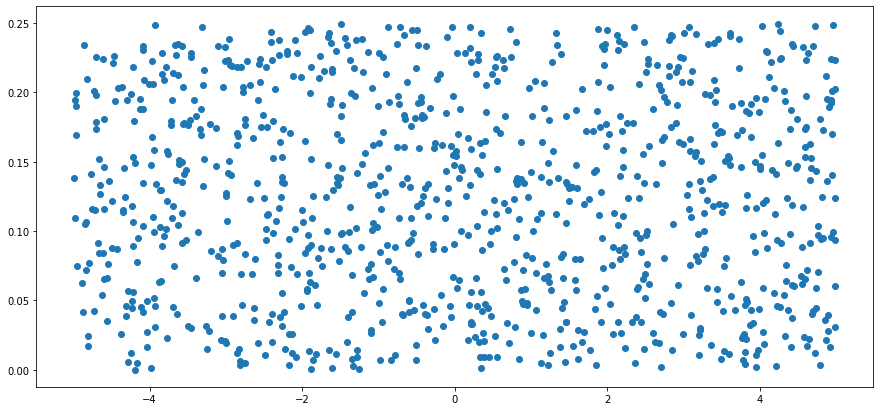

In [113]:
noisy = torch.rand(y.shape)/4
plt.plot(x_train, noisy, 'o')

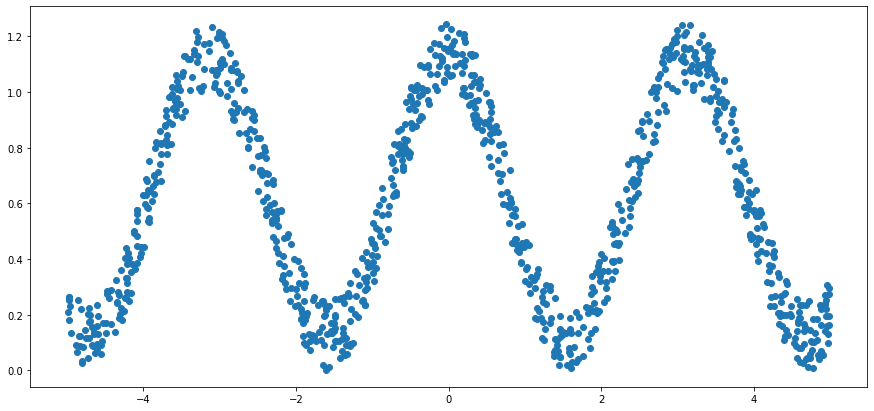

In [114]:
y_train = y + noisy
plt.plot(x_train, y_train, 'o')

In [115]:
# convert row to colomn
x_train.unsqueeze_(1)
y_train.unsqueeze_(1); 
x_train.shape

torch.Size([1000, 1])

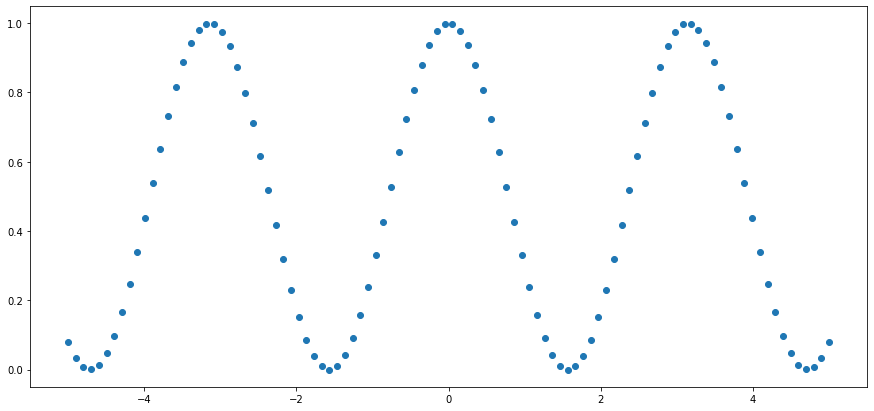

In [116]:
x_val = torch.linspace(-5,5,100)
y_val = torch.cos(x_val.data)**2

plt.plot(x_val, y_val, 'o')

In [117]:
#Create the Net
class Net(torch.nn.Module):
  def __init__(self, n_hid):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hid)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hid, 1)
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
    

In [118]:
net = Net(50)

In [80]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', c='g')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c= 'r')

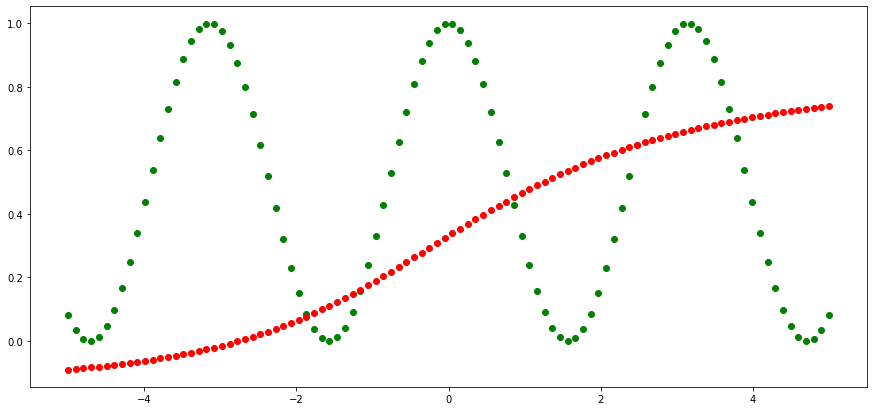

In [119]:

x_val.unsqueeze_(1)
y_val.unsqueeze_(1); 
x_val.shape

predict(net, x_val, y_val)

In [120]:
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

def loss(pred, true):
  sq = (pred- true)**2
  return sq.mean()

In [121]:
# Training loop
for e in range(3000):
  # zero grad before new step
  optimizer.zero_grad()

  y_pred = net.forward(x_train)
  loss_val = loss(y_pred, y_train)
  
  # Backward pass and update
  loss_val.backward()
  optimizer.step()

  if not e%500:
    print(loss_val)

tensor(0.2961, grad_fn=<MeanBackward0>)
tensor(0.1301, grad_fn=<MeanBackward0>)
tensor(0.1274, grad_fn=<MeanBackward0>)
tensor(0.1197, grad_fn=<MeanBackward0>)
tensor(0.0900, grad_fn=<MeanBackward0>)
tensor(0.0435, grad_fn=<MeanBackward0>)


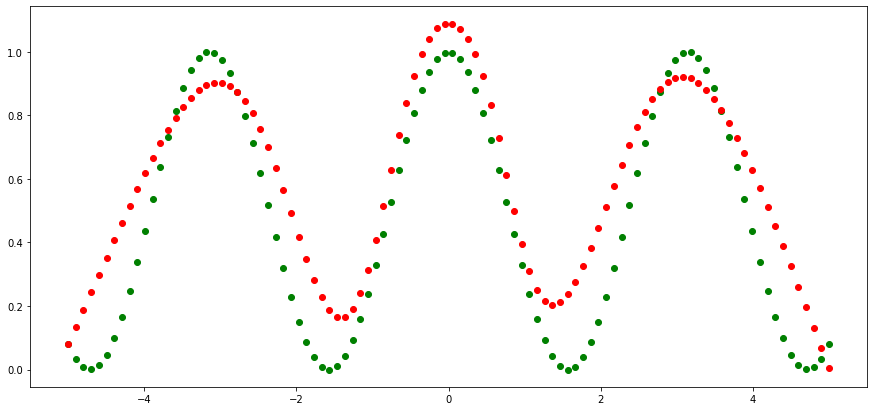

In [122]:
predict(net, x_val, y_val)